In [5]:
# !pip install pandas 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
pr = pd.read_csv("C:/Users/pranj/Downloads/bollywood.csv")
pr.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [7]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB


In [8]:
pr.shape

(149, 10)

In [9]:
pr.columns

Index(['SlNo', 'Release Date', 'MovieName', 'ReleaseTime', 'Genre', 'Budget',
       'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
       'YoutubeDislikes'],
      dtype='object')

In [10]:
pr.describe()

,SlNo,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
count,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000
mean,75.000000,29.442953,55.667248,3.337920e+06,7877.536913,1207.818792
std,43.156691,28.237981,94.494531,3.504407e+06,12748.047191,1852.692938
min,1.000000,2.000000,0.010000,4.354000e+03,1.000000,1.000000
25%,38.000000,11.000000,8.780000,1.076591e+06,1377.000000,189.000000
50%,75.000000,21.000000,28.000000,2.375050e+06,4111.000000,614.000000
75%,112.000000,35.000000,57.450000,4.550051e+06,9100.000000,1419.000000
max,149.000000,150.000000,735.000000,2.317107e+07,101275.000000,11888.000000


In [11]:
pr['Release Date']

0      18-Apr-14
1       4-Jan-13
2      18-Jul-14
3       4-Jan-13
4       4-Jul-14
         ...    
144    27-Feb-15
145    13-Mar-15
146    20-Mar-15
147    20-Mar-15
148    23-May-14
Name: Release Date, Length: 149, dtype: object

## QUESTION no: 2

In [12]:
genre_count = pr['Genre'].value_counts()
genre_count 

Genre
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: count, dtype: int64

In [13]:
genre_count.idxmax()

'Comedy'

## QUESTION NO: 3

In [14]:
pd.crosstab(pr['Genre'],pr['ReleaseTime'])
            
            

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


## Question no:4

In [23]:
pr['Release Date'] = pd.to_datetime(pr['Release Date'])
pr['Month'] = pr['Release Date'].dt.month 
pr['Month'].value_counts().sort_values(ascending=False)

Month
1     20
3     19
5     18
7     16
2     16
4     11
6     10
9     10
11    10
10     9
8      8
12     2
Name: count, dtype: int64

In [22]:
pr['Release Date'] = pd.to_datetime(pr['Release Date'])
pr['Month'] = pr['Release Date'].dt.month
pr['Month'].value_counts().sort_values(ascending=False)


Month
1     20
3     19
5     18
7     16
2     16
4     11
6     10
9     10
11    10
10     9
8      8
12     2
Name: count, dtype: int64

In [26]:
pr['Month'].value_counts().idxmax()

np.int32(1)

In [25]:
pr['Month'].value_counts().idxmin()

np.int32(12)

## Question no:5 

In [29]:
h_budget = pr [pr['Budget'] >= 25]
h_budget_Month = h_budget['Month'].value_counts()
print(h_budget_Month)

Month
2     9
1     8
8     7
3     7
11    6
7     6
6     5
9     5
4     4
10    4
5     3
12    2
Name: count, dtype: int64


#  Question no: 6 

In [31]:
pr["ROI"] = (pr["BoxOfficeCollection"] - pr["Budget"]) / pr['Budget']
pr.sort_values(by='ROI', ascending= False).head(10)


,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,Month,ROI
64,65,2013-04-26,Aashiqui 2,N,Romance,12,110.0,2926673,4944,628,4,8.166667
89,90,2014-12-19,PK,HS,Drama,85,735.0,13270623,43767,5693,12,7.647059
132,133,2013-09-13,Grand Masti,LW,Comedy,35,298.0,1795640,3015,721,9,7.514286
135,136,2013-09-20,The Lunchbox,N,Drama,10,85.0,1064854,4054,285,9,7.500000
87,88,2013-06-14,Fukrey,N,Comedy,5,36.2,227912,222,39,6,6.240000
58,59,2014-09-05,Mary Kom,N,Drama,15,104.0,6086811,26560,1647,9,5.933333
128,129,2013-10-18,Shahid,FS,Drama,6,40.0,1148516,3155,396,10,5.666667
37,38,2014-07-11,Humpty Sharma Ki Dulhania,N,Romance,20,130.0,6604595,14535,2208,7,5.500000
101,102,2013-07-12,Bhaag Milkha Bhaag,N,Drama,30,164.0,2635390,4622,456,7,4.466667
115,116,2013-08-09,Chennai Express,FS,Comedy,75,395.0,1882346,7954,1593,8,4.266667


## Question no:7

In [32]:
pr.groupby('ReleaseTime')['ROI'].mean()


ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

#### Question no:8

In [40]:
## use seaborn

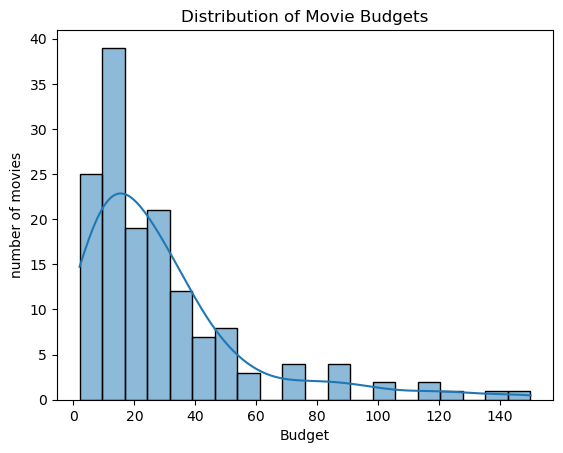

In [41]:
plt.figure()
sns.histplot(pr['Budget'], bins =20, kde=True)
plt.title("Distribution of Movie Budgets")
plt.ylabel('number of movies')
plt.show()

In [39]:
## use matplotlib librarr

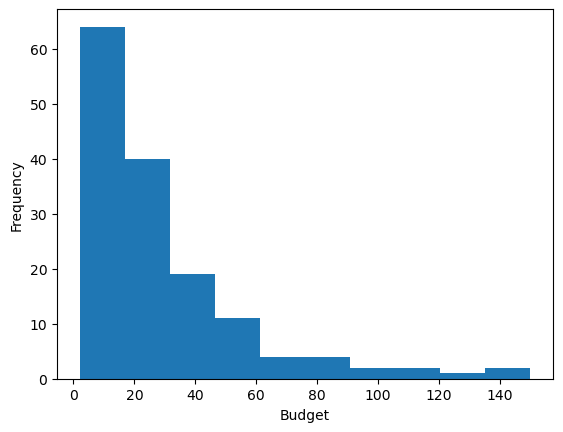

In [38]:
plt.hist(pr['Budget'], bins=10)
plt.xlabel("Budget")
plt.ylabel("Frequency")
plt.show()

## Question No: 9 

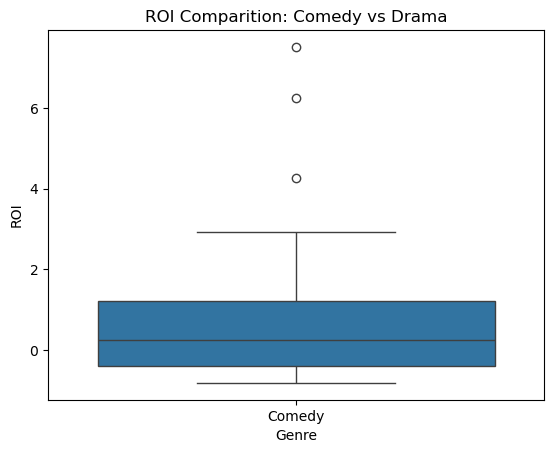

In [47]:
pr_sub = pr[pr['Genre'].isin(['Comedy', 'Drama'])]
sns.boxplot(x='Genre', y='ROI', data=pr_sub)
plt.title("ROI Comparition: Comedy vs Drama")
plt.show()

### Question No:10

In [49]:
corr = pr['BoxOfficeCollection'].corr(pr['YoutubeLikes'])
print("Correlation:", corr)


Correlation: 0.6825165877731297


## Question No:11

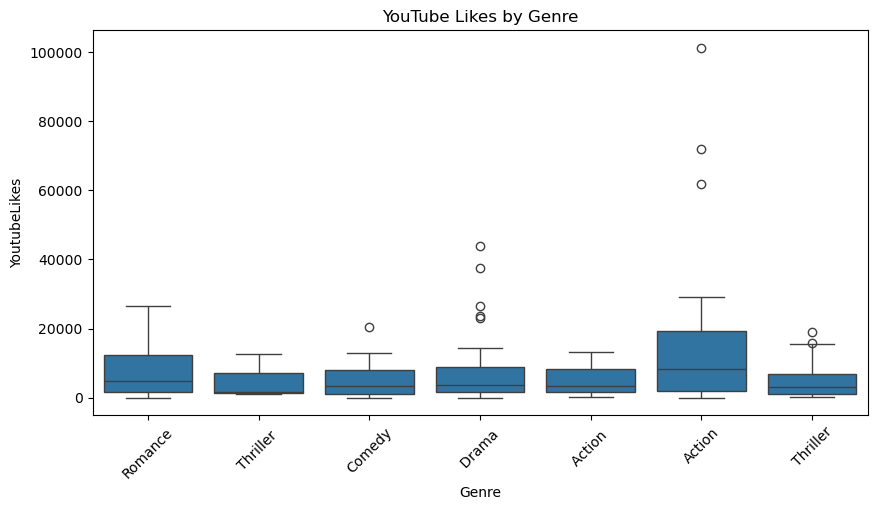

In [60]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Genre', y='YoutubeLikes', data=pr)
plt.xticks(rotation=45)
plt.title("YouTube Likes by Genre")
plt.show()


### Question No: 12

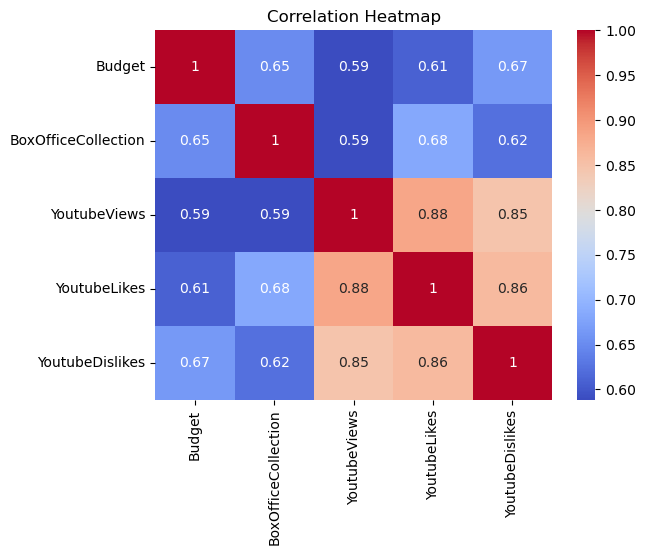

In [62]:
corr_matrix = pr[['Budget','BoxOfficeCollection',
                  'YoutubeViews','YoutubeLikes','YoutubeDislikes']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Use SAheart  dataset 

### Quetion no:1

In [9]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

url = "https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data"

df = pd.read_csv(url)

print(df.head())


   row.names  sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  \
0          1  160    12.00  5.73      23.11  Present     49    25.30    97.20   
1          2  144     0.01  4.41      28.61   Absent     55    28.87     2.06   
2          3  118     0.08  3.48      32.28  Present     52    29.14     3.81   
3          4  170     7.50  6.41      38.03  Present     51    31.99    24.26   
4          5  134    13.60  3.50      27.78  Present     60    25.99    57.34   

   age  chd  
0   52    1  
1   63    1  
2   46    0  
3   58    1  
4   49    1  


In [10]:
df.shape 

(462, 11)

In [11]:
df.tail()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
457,459,214,0.4,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.2,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.0,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.4,11.61,30.79,Absent,64,27.35,23.97,40,0
461,463,132,0.0,4.82,33.41,Present,62,14.70,0.00,46,1


### Question no: 13 

In [12]:
df.info 

<bound method DataFrame.info of      row.names  sbp  tobacco    ldl  adiposity  famhist  typea  obesity  \
0            1  160    12.00   5.73      23.11  Present     49    25.30   
1            2  144     0.01   4.41      28.61   Absent     55    28.87   
2            3  118     0.08   3.48      32.28  Present     52    29.14   
3            4  170     7.50   6.41      38.03  Present     51    31.99   
4            5  134    13.60   3.50      27.78  Present     60    25.99   
..         ...  ...      ...    ...        ...      ...    ...      ...   
457        459  214     0.40   5.98      31.72   Absent     64    28.45   
458        460  182     4.20   4.41      32.10   Absent     52    28.61   
459        461  108     3.00   1.59      15.23   Absent     40    20.09   
460        462  118     5.40  11.61      30.79   Absent     64    27.35   
461        463  132     0.00   4.82      33.41  Present     62    14.70   

     alcohol  age  chd  
0      97.20   52    1  
1       2.06   63

In [14]:
df.columns 

Index(['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd'],
      dtype='object')

In [13]:
print("Number of records:", df.shape[0])

Number of records: 462


#### Question no: 14

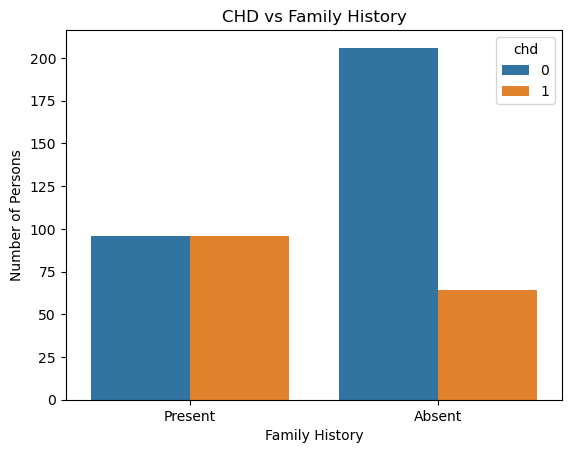

In [17]:
plt.figure()
sns.countplot(data=df, x="famhist", hue="chd")
plt.xlabel("Family History")
plt.ylabel("Number of Persons")
plt.title("CHD vs Family History")
plt.show()


### Question no: 14

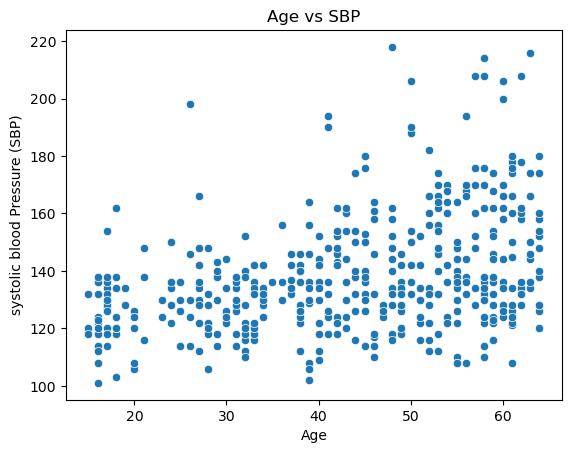

In [30]:
plt.figure()
sns.scatterplot(data=df, x="age", y="sbp")
plt.xlabel("Age")
plt.ylabel("systolic blood Pressure (SBP)")
plt.title ("Age vs SBP")
plt.show()

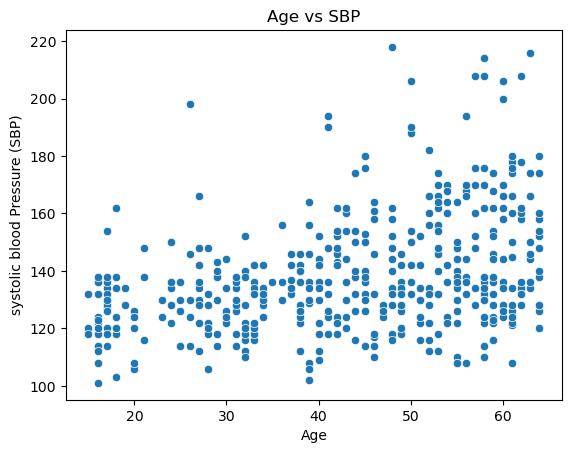

In [28]:
plt.figure()
sns.scatterplot(data=df, x="age", y="sbp")
plt.xlabel("Age")
plt.ylabel("systolic blood Pressure (SBP)")
plt.title("Age vs SBP")
plt.show()


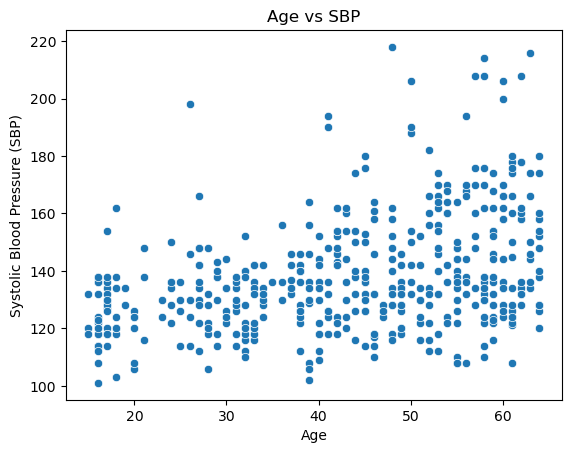

In [18]:
plt.figure()
sns.scatterplot(data=df, x="age", y="sbp")
plt.xlabel("Age")
plt.ylabel("Systolic Blood Pressure (SBP)")
plt.title("Age vs SBP")
plt.show()




In [19]:
# Correlation value
print("Correlation (age vs sbp):", df["age"].corr(df["sbp"]))

Correlation (age vs sbp): 0.3887705972765735


### Question no: 16

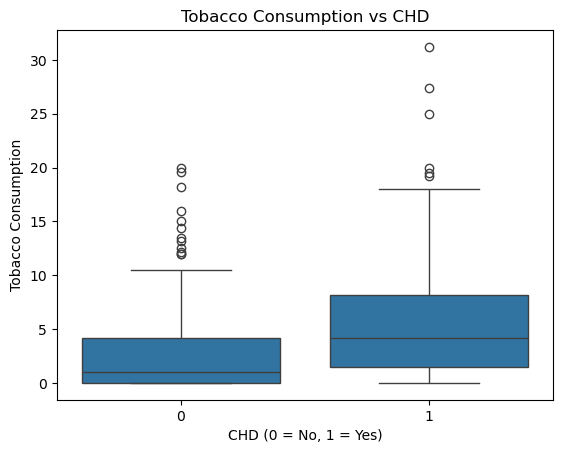

In [20]:
plt.figure()
sns.boxplot(data=df, x="chd", y="tobacco")
plt.xlabel("CHD (0 = No, 1 = Yes)")
plt.ylabel("Tobacco Consumption")
plt.title("Tobacco Consumption vs CHD")
plt.show()


### Question no: 17


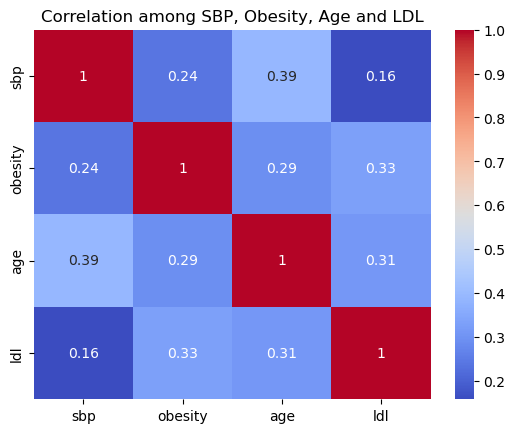

In [23]:
cols = ["sbp", "obesity", "age", "ldl"]

corr_matrix = df[cols].corr()

plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation among SBP, Obesity, Age and LDL")
plt.show() 


### Question NO: 18 

In [24]:
def age_group(age):
    if age <= 15:
        return "young"
    elif age <= 35:
        return "adults"
    elif age <= 55:
        return "mid"
    else:
        return "old"

df["agegroup"] = df["age"].apply(age_group)

df[["age", "agegroup"]].head()


,age,agegroup
0,52,mid
1,63,old
2,46,mid
3,58,old
4,49,mid


### Question No:19

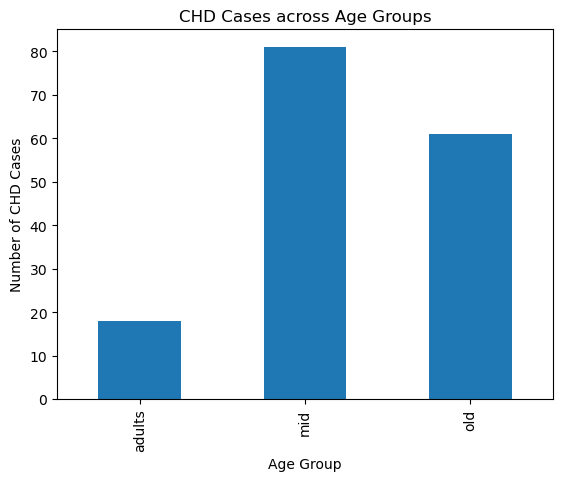

In [25]:
chd_agegroup = df[df["chd"] == 1]["agegroup"].value_counts().sort_index()

plt.figure()
chd_agegroup.plot(kind="bar")
plt.xlabel("Age Group")
plt.ylabel("Number of CHD Cases")
plt.title("CHD Cases across Age Groups")
plt.show()


### Question no: 20 

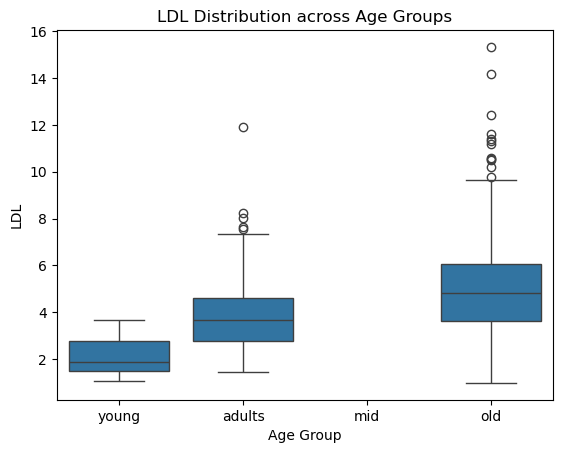

In [35]:
plt.figure()
sns.boxplot(data=df, x="agegroup", y="ldl", order=["young", "adults", "mid", "old"])
plt.xlabel("Age Group")
plt.ylabel("LDL")
plt.title("LDL Distribution across Age Groups")
plt.show()

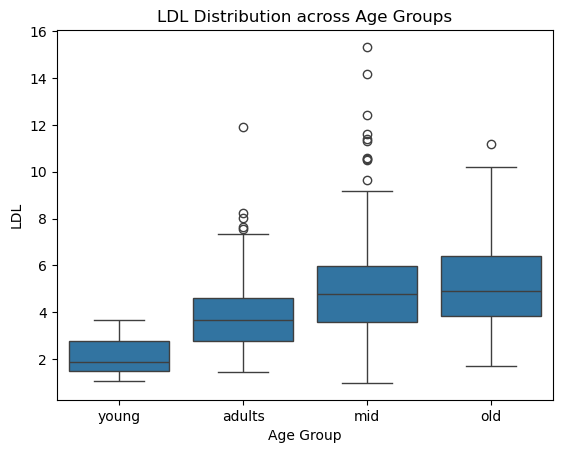

In [26]:
plt.figure()
sns.boxplot(data=df, x="agegroup", y="ldl", order=["young", "adults", "mid", "old"])
plt.xlabel("Age Group")
plt.ylabel("LDL")
plt.title("LDL Distribution across Age Groups")
plt.show()
